In [1]:
import numpy as np
from tqdm import tqdm
from itertools import product
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [2]:
def switch_4x4(phase, input_state = np.array([1, 0, 0, 0])):
  # T_mmi_4x4 = 1/2*np.array([
  #   [1, -np.exp(-1j*np.pi/4), np.exp(-1j*np.pi/4), 1],
  #   [-np.exp(-1j*np.pi/4), 1, 1, np.exp(-1j*np.pi/4)],
  #   [np.exp(1j*np.pi/4), 1, 1, -np.exp(1j*np.pi/4)],
  #   [1, np.exp(1j*np.pi/4), -np.exp(1j*np.pi/4), 1]
  # ])  
  T_mmi_4x4 = 1/2*np.array([
    [1, -np.exp(-1j*np.pi/4), np.exp(1j*np.pi/4), 1],
    [-np.exp(-1j*np.pi/4), 1, 1, np.exp(-1j*np.pi/4)],
    [np.exp(-1j*np.pi/4), 1, 1, -np.exp(-1j*np.pi/4)],
    [1, np.exp(-1j*np.pi/4), -np.exp(-1j*np.pi/4), 1]
  ])

  T_ps_4x4 = np.array([
    [np.exp(1j*phase[0]), 0, 0, 0],
    [0, np.exp(1j*phase[1]), 0, 0],
    [0, 0, np.exp(1j*phase[2]), 0],
    [0, 0, 0, np.exp(1j*phase[3])]
  ])

  output_state = T_mmi_4x4 @ T_ps_4x4 @ T_mmi_4x4 @ input_state

  return output_state  

def optimization_func(phase, input_state = np.array([1, 0, 0, 0]), target_state = np.array([0, 1, 0, 0])):
  output_state = switch_4x4(phase, input_state)
  fidelity = 0
  for idd_state, idd_state_value in enumerate(target_state):
    if idd_state_value == 0:
      fidelity += 1-np.abs(output_state[idd_state])**2
    else:
      fidelity += np.abs(output_state[idd_state])**2
  return -fidelity

In [3]:
def minimize_value(input_state, output_state):
  fidelity_values = []
  num_range = 21
  phase = np.linspace(0, 2*np.pi, num_range)
  for phase_1, phase_2, phase_3, phase_4 in product(phase, phase, phase, phase):
    fidelity_values.append(optimization_func([phase_1, phase_2, phase_3, phase_4], input_state, output_state))
  
  fidelity_values = np.array(fidelity_values)

  for idd_1, idd_2, idd_3, idd_4 in product(range(num_range), range(num_range), range(num_range), range(num_range)):
    if fidelity_values[idd_1*num_range**3 + idd_2*num_range**2 + idd_3*num_range + idd_4] == np.min(fidelity_values):
      phase_value = [phase[idd_1], phase[idd_2], phase[idd_3], phase[idd_4]]
      break
  return phase_value

In [4]:
A = np.random.rand(4,4)
np.argmin(A)

2

In [5]:
bounds = [(0, 2*np.pi)]*4
params = {}
idd = 0

binary_list = []

for number in range(2**4):
    binary_value = '{0:04b}'.format(number)
    zeros = 0
    ones = 0
    binary_list.append(binary_value)

for input_binary in tqdm(binary_list, total=len(binary_list)):
    zeros = 0
    ones = 0
    for number in range(len(input_binary)):
        if input_binary[number] == '0':
            zeros += 1
        else:
            ones += 1
    output_binary_list = []
    for number in range(2**4):
        binary_value = '{0:04b}'.format(number)
        zeros_ = 0
        ones = 0
        for number in range(len(binary_value)):
            if binary_value[number] == '0':
                zeros_ += 1
            else:
                ones += 1
        if zeros == zeros_ and ones == ones:
            output_binary_list.append(binary_value)
    for output_binary in output_binary_list:
        input_state = np.array([int(x) for x in input_binary])
        output_state = np.array([int(x) for x in output_binary])
        phase_value = minimize_value(input_state, output_state)
        # params = minimize(optimization_func, phase_value, args=(input_state, output_state), method='SLSQP', bounds=bounds)
        # Phase = np.array(phase_value)
        fidelity = -optimization_func(phase_value, input_state, output_state)
        params[idd] = {
            "input_state_ideal": input_state,
            "output_state_ideal": output_state,
            "output_state_optimized": switch_4x4(phase_value, input_state),
            "phase_params": phase_value,
            "fidelity": fidelity
        }

        idd += 1

100%|██████████| 16/16 [03:23<00:00, 12.69s/it]


In [6]:
fidelity_list = []
for key, values in params.items():
    fidelity_list.append(values["fidelity"])

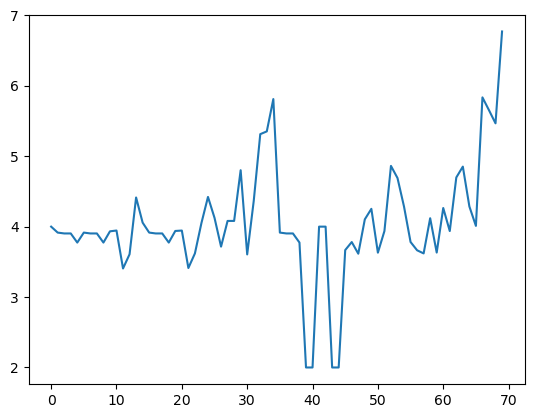

In [7]:
plt.plot(fidelity_list)

In [8]:
fidelity_list

[4.0,
 3.915546635815102,
 3.9033107648888907,
 3.9033107648888903,
 3.773800842500283,
 3.915546635815102,
 3.9033107648888903,
 3.9033107648888903,
 3.773800842500283,
 3.933498948381337,
 3.9448679942989955,
 3.4058389686033754,
 3.60787748610484,
 4.41439181299403,
 4.056927331012213,
 3.915546635815102,
 3.9033107648888907,
 3.9033107648888903,
 3.773800842500283,
 3.9386525299725794,
 3.9444412383328493,
 3.4125542776223448,
 3.619661058808892,
 4.051817423752525,
 4.421707223780819,
 4.124985897776441,
 3.716180884523865,
 4.0810932716302055,
 4.081093271630205,
 4.801310743854895,
 3.6055650134826283,
 4.364116961057536,
 5.313369064447861,
 5.352514652473773,
 5.8116061616507215,
 3.915546635815102,
 3.9033107648888907,
 3.9033107648888907,
 3.773800842500283,
 2.000000000000001,
 2.000000000000001,
 4.000000000000001,
 4.0,
 2.000000000000001,
 2.0000000000000004,
 3.667203004604512,
 3.7810953414115014,
 3.6157605281046328,
 4.103524657178421,
 4.252918698197196,
 3.63029590